Code Overview and Objectives:

The code implements a machine learning approach to predict and visualize the risk of different types of alerts (LOW, MEDIUM, HIGH, SIGMA) for multiple HTOL (Highly Temperature Operating Life) machines. The main objectives are:
a) To process historical alert data from multiple machines.
b) To build a predictive model that can identify periods of high risk for each type of alert.
c) To visualize the actual alerts and predicted high-risk periods for easy interpretation.

Detailed Code Explanation:

a) Data Loading and Preprocessing (load_and_preprocess_data):

Loads data from CSV files for each HTOL machine (HTOL-09 to HTOL-15).
Combines data into a single DataFrame, adding a 'machine_id' column.
Converts the 'Time' column to datetime format and sorts the data.

b) Feature Engineering (engineer_features):

Extracts time-based features: hour, day of week, month, is_weekend.
Calculates rolling statistics (mean and standard deviation) for the ChlPrs (Chiller Pressure) values.
Computes the time since the last alert for each alert type.

c) Data Preparation for Classification (prepare_data_for_classification):

Creates a binary target variable indicating whether an alert of the specified type occurs within the next prediction_window days.
Selects relevant features for the model.

d) Model Training and Evaluation (train_and_evaluate_classifier):

Splits data into training and testing sets.
Scales the features using StandardScaler.
Trains a Random Forest Classifier.
Evaluates the model using classification metrics (precision, recall, F1-score).

e) Visualization (visualize_alerts_efficient):

Uses the trained model to predict the probability of an alert for each data point.
Marks periods as "high risk" if the predicted probability exceeds the probability_threshold.
Creates a plot showing actual alerts and high-risk periods for each machine.

f) Main Execution:

Loads and preprocesses the data.
For each alert type (LOW, MEDIUM, HIGH, SIGMA):

Prepares the data.
Trains and evaluates a model.
Visualizes the results.


Demonstrates how to make predictions on new data.


Interpreting the Results:

a) Classification Report:
For each alert type, you'll see a classification report with the following metrics:

Precision: The proportion of predicted alerts that were actual alerts.
Recall: The proportion of actual alerts that were correctly predicted.
F1-score: The harmonic mean of precision and recall.
Support: The number of occurrences of each class.

Interpretation: Higher values for precision, recall, and F1-score indicate better model performance. Pay attention to the balance between precision and recall - high precision means fewer false alarms, while high recall means fewer missed alerts.
b) Visualized Results:
The plot for each alert type shows:

X-axis: Time
Y-axis: Machine IDs
Blue circles: Actual alerts
Orange crosses: Predicted high-risk periods

Interpretation:

Alignment of crosses and circles: When orange crosses (high-risk periods) align closely with blue circles (actual alerts), it indicates good model performance.
Crosses without nearby circles: Potential false positives or periods of elevated risk that didn't result in alerts.
Circles without nearby crosses: Missed alerts or unexpected alert occurrences.
Density of crosses: Areas with many crosses indicate periods of consistently high risk.

c) Probability Predictions:
For the example new data point, the code outputs the probability of each alert type occurring within the prediction window.
Interpretation: Higher probabilities indicate a greater risk of an alert in the near future. You might consider setting different action thresholds for different alert types based on their severity and frequency.

Practical Application and Insights:

a) Risk-Based Maintenance:
Use the high-risk periods identified by the model to schedule preventive maintenance. Prioritize machines and time periods with the highest predicted risk.
b) Resource Allocation:
Allocate monitoring resources more efficiently by focusing on high-risk periods and machines.
c) Root Cause Analysis:
Analyze the features that contribute most to high-risk predictions to understand the factors leading to alerts.
d) Performance Monitoring:
Regularly compare predicted high-risk periods with actual alert occurrences to assess and improve model performance over time.
e) Operational Insights:
Look for patterns in high-risk periods across machines or alert types. This might reveal systemic issues or opportunities for process improvement.

Limitations and Considerations:

a) Prediction Window:
The current 7-day prediction window is a balance between providing actionable foresight and maintaining prediction accuracy. Adjusting this window will affect the model's performance and utility.
b) Probability Threshold:
The 0.7 threshold for high-risk periods can be adjusted. A lower threshold will identify more potential risks but may increase false positives.
c) Feature Importance:
Consider analyzing feature importance in the Random Forest model to understand which factors are most predictive of alerts.
d) Model Updates:
Regular retraining of the model with new data will help maintain its relevance and accuracy as machine conditions or operations change over time.
e) Imbalanced Data:
If certain alert types are rare, consider using techniques for imbalanced data learning to improve prediction of these less frequent but potentially critical events.
By leveraging this predictive model and its visualizations, you can move from reactive maintenance to a more proactive, risk-based approach, potentially reducing downtime and optimizing maintenance schedules for your HTOL machines.

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Code 4 offers some distinct advantages and a different approach compared to Code 3. Here's a breakdown of how to integrate Code 4 into production, along with inputs, outputs, and how engineers can leverage it:

**Code 4: Predicting Alert Risk (Classification)**

**Integration into Production:**

1. **Real-time Data Ingestion:**
   -  Crucially, you need a pipeline that can ingest `ChlPrs` data in real-time or near real-time. This might involve technologies like Kafka, Apache Pulsar, or direct connections to machine sensors.

2. **Feature Engineering Pipeline:**
   -  The `engineer_features` function needs to be part of this pipeline. As new `ChlPrs` data comes in, this function will calculate the rolling statistics, time-based features, and time since last alerts, preparing the data for the model.

3. **Model Deployment for Classification:**
   -  Deploy your trained Random Forest Classifier models (one for each alert type: `LOW`, `MEDIUM`, `HIGH`, `SIGMA`).  Use a robust model serving framework like TensorFlow Serving, TorchServe, or cloud platforms like AWS SageMaker or Google AI Platform.

4. **Alert Risk Prediction Service:**
   -  Build a service that accepts new data points (with engineered features) as input. This service will use the saved `StandardScaler` to scale the features and then send them to the appropriate deployed model for prediction.
   -  The output of this service will be the probability of each alert type occurring within your defined prediction window (e.g., 7 days).

5. **Risk Thresholds and Alerting:**
   -  Establish clear probability thresholds for each alert type. These thresholds define what constitutes "high risk." You'll likely want different thresholds for different alert types, considering their severity and the cost of false positives vs. missed alerts.
   -  When the predicted probability of an alert type exceeds its threshold, the system should generate an alert. This alert should be sent to the responsible engineers and include key information: machine ID, alert type, and the predicted probability.

**Inputs and Outputs:**

- **Input:**
    - `ChlPrs`: The current Chiller Pressure reading.
    - Time-based features (hour, day of week, month, is_weekend).
    - Rolling mean and standard deviation of `ChlPrs`.
    - Time since the last occurrence of each alert type (`LOW`, `MEDIUM`, `HIGH`, `SIGMA`).

- **Output:**  The probability of each alert type (`LOW`, `MEDIUM`, `HIGH`, `SIGMA`) occurring within the prediction window (e.g., in the next 7 days).

**How Engineers Can Use the Predictions:**

- **Proactive Maintenance:** Engineers can use the predicted probabilities to prioritize maintenance.  Machines with a high probability of a `HIGH` severity alert should be addressed urgently, while those with a low probability of a `LOW` severity alert might be scheduled for routine checks later.
- **Early Intervention:** If the system predicts a high probability of an alert, engineers can investigate the machine preemptively. This allows them to address potential issues before they escalate into actual alerts, potentially preventing downtime altogether.
- **Resource Optimization:**  Maintenance resources (personnel, parts, etc.) can be allocated more efficiently based on the predicted risk levels across all machines.
- **Continuous Monitoring:** The predicted probabilities provide a continuous risk assessment. Engineers can monitor these probabilities to identify trends, potential problems developing over time, or the effectiveness of recent maintenance.

**Advantages of Code 4's Classification Approach:**

- **Risk Quantification:** Provides a clear probability of an alert occurring, giving engineers a quantifiable measure of risk.
- **Prioritization:**  Facilitates better prioritization of maintenance tasks by considering both the type of alert and the likelihood of it happening.
- **Early Warning:**  Offers an early warning system, potentially allowing engineers to intervene before an alert even occurs.

By integrating Code 4 into your production environment, you empower your engineers with valuable predictive insights, enabling a shift from reactive to proactive maintenance, optimizing resource allocation, and potentially reducing costly downtime.

In [11]:

# Load and preprocess data
def load_and_preprocess_data(folder):
    dfs = []
    for i in range(9, 16):
        file_name = f"HTOL-{i:02d}_alerts.csv"
        df = pd.read_csv(os.path.join(folder, file_name))
        df['machine_id'] = f'HTOL-{i:02d}'
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['Time'] = pd.to_datetime(combined_df['Time'])
    combined_df = combined_df.sort_values(['machine_id', 'Time'])

    return combined_df

In [12]:

# Feature engineering
def engineer_features(df):
    df['hour'] = df['Time'].dt.hour
    df['day_of_week'] = df['Time'].dt.dayofweek
    df['month'] = df['Time'].dt.month
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

    # Calculate rolling statistics
    df['rolling_mean'] = df.groupby('machine_id')['ChlPrs'].rolling(window=24, min_periods=1).mean().reset_index(0, drop=True)
    df['rolling_std'] = df.groupby('machine_id')['ChlPrs'].rolling(window=24, min_periods=1).std().reset_index(0, drop=True)

    # Calculate time since last alert for each type
    alert_types = ['LOW', 'MEDIUM', 'HIGH', 'SIGMA']
    for alert_type in alert_types:
        df[f'time_since_{alert_type}'] = df.groupby('machine_id').apply(lambda x: x['Time'] - x[x['ALERT'] == alert_type]['Time'].shift(1)).reset_index(level=0, drop=True)
        df[f'time_since_{alert_type}'] = df[f'time_since_{alert_type}'].dt.total_seconds() / 3600  # Convert to hours

    return df

In [13]:

def prepare_data_for_classification(df, target_alert_type, prediction_window):
    df['target'] = df.groupby('machine_id').apply(lambda x: (x['ALERT'] == target_alert_type).rolling(window=prediction_window).max().shift(-prediction_window+1)).reset_index(level=0, drop=True)

    features = ['ChlPrs', 'hour', 'day_of_week', 'month', 'is_weekend', 'rolling_mean', 'rolling_std'] + [f'time_since_{at}' for at in ['LOW', 'MEDIUM', 'HIGH', 'SIGMA']]
    X = df[features]
    y = df['target'].fillna(0)  # Fill NaN with 0 (no alert)

    return X, y

In [14]:

def train_and_evaluate_classifier(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))

    return model, scaler

In [15]:

def visualize_alerts_efficient(df, model, scaler, target_alert_type, prediction_window, probability_threshold=0.7):
    features = ['ChlPrs', 'hour', 'day_of_week', 'month', 'is_weekend', 'rolling_mean', 'rolling_std'] + [f'time_since_{at}' for at in ['LOW', 'MEDIUM', 'HIGH', 'SIGMA']]
    X = df[features]
    X_scaled = scaler.transform(X)

    df['alert_probability'] = model.predict_proba(X_scaled)[:, 1]
    df['high_risk'] = df['alert_probability'] > probability_threshold

    plt.figure(figsize=(20, 15))
    machines = df['machine_id'].unique()
    n_machines = len(machines)

    for i, machine_id in enumerate(machines):
        machine_df = df[df['machine_id'] == machine_id]

        # Plot actual alerts
        alerts = machine_df[machine_df['ALERT'] == target_alert_type]
        plt.scatter(alerts['Time'], [i-0.2] * len(alerts), marker='o', s=100, label=f'Actual {target_alert_type} Alert' if i == 0 else "")

        # Plot high-risk periods
        high_risk_periods = machine_df[machine_df['high_risk']]
        plt.scatter(high_risk_periods['Time'], [i+0.2] * len(high_risk_periods), marker='x', s=100, label=f'High Risk Period ({target_alert_type})' if i == 0 else "")

        plt.text(df['Time'].min(), i, machine_id, va='center', ha='right', fontweight='bold')

    plt.yticks(range(n_machines), [""] * n_machines)
    plt.xlabel('Date')
    plt.ylabel('Machine ID')
    plt.title(f'Actual Alerts vs High Risk Periods for {target_alert_type} Alerts')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_23965/670758071.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df[f'time_since_{alert_type}'] = df.groupby('machine_id').apply(lambda x: x['Time'] - x[x['ALERT'] == alert_type]['Time'].shift(1)).reset_index(level=0, drop=True)
/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_23965/670758071.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this w


Training model for LOW alerts:


/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_23965/3239783937.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['target'] = df.groupby('machine_id').apply(lambda x: (x['ALERT'] == target_alert_type).rolling(window=prediction_window).max().shift(-prediction_window+1)).reset_index(level=0, drop=True)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    265420
         1.0       0.98      0.17      0.30       521

    accuracy                           1.00    265941
   macro avg       0.99      0.59      0.65    265941
weighted avg       1.00      1.00      1.00    265941



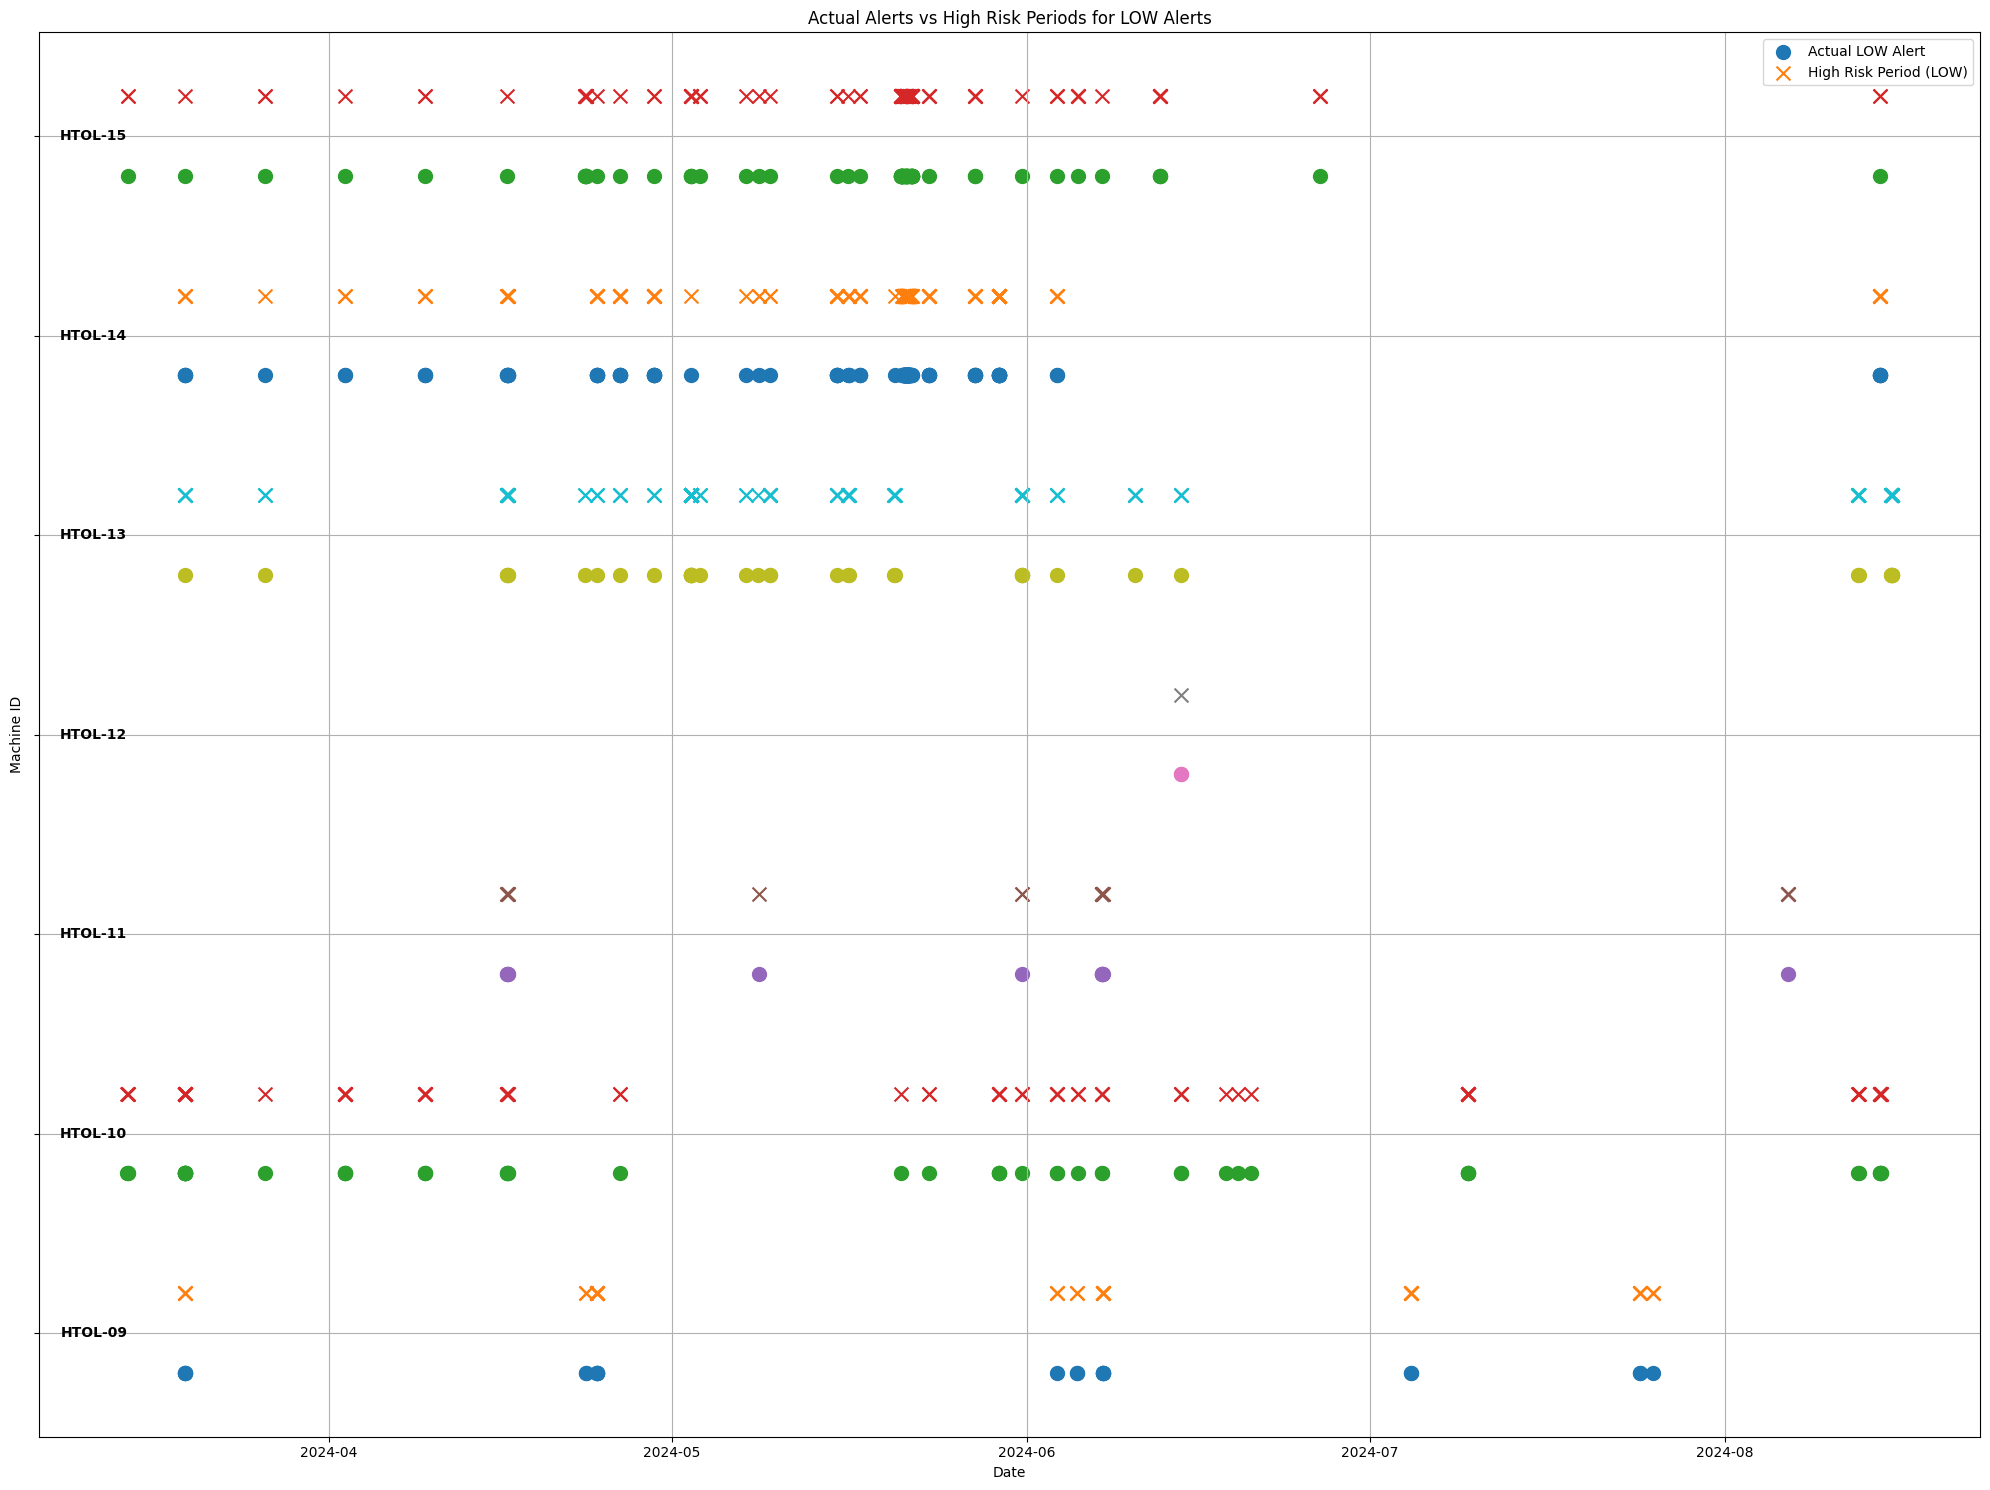


Training model for MEDIUM alerts:


/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_23965/3239783937.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['target'] = df.groupby('machine_id').apply(lambda x: (x['ALERT'] == target_alert_type).rolling(window=prediction_window).max().shift(-prediction_window+1)).reset_index(level=0, drop=True)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    265918
         1.0       1.00      0.43      0.61        23

    accuracy                           1.00    265941
   macro avg       1.00      0.72      0.80    265941
weighted avg       1.00      1.00      1.00    265941



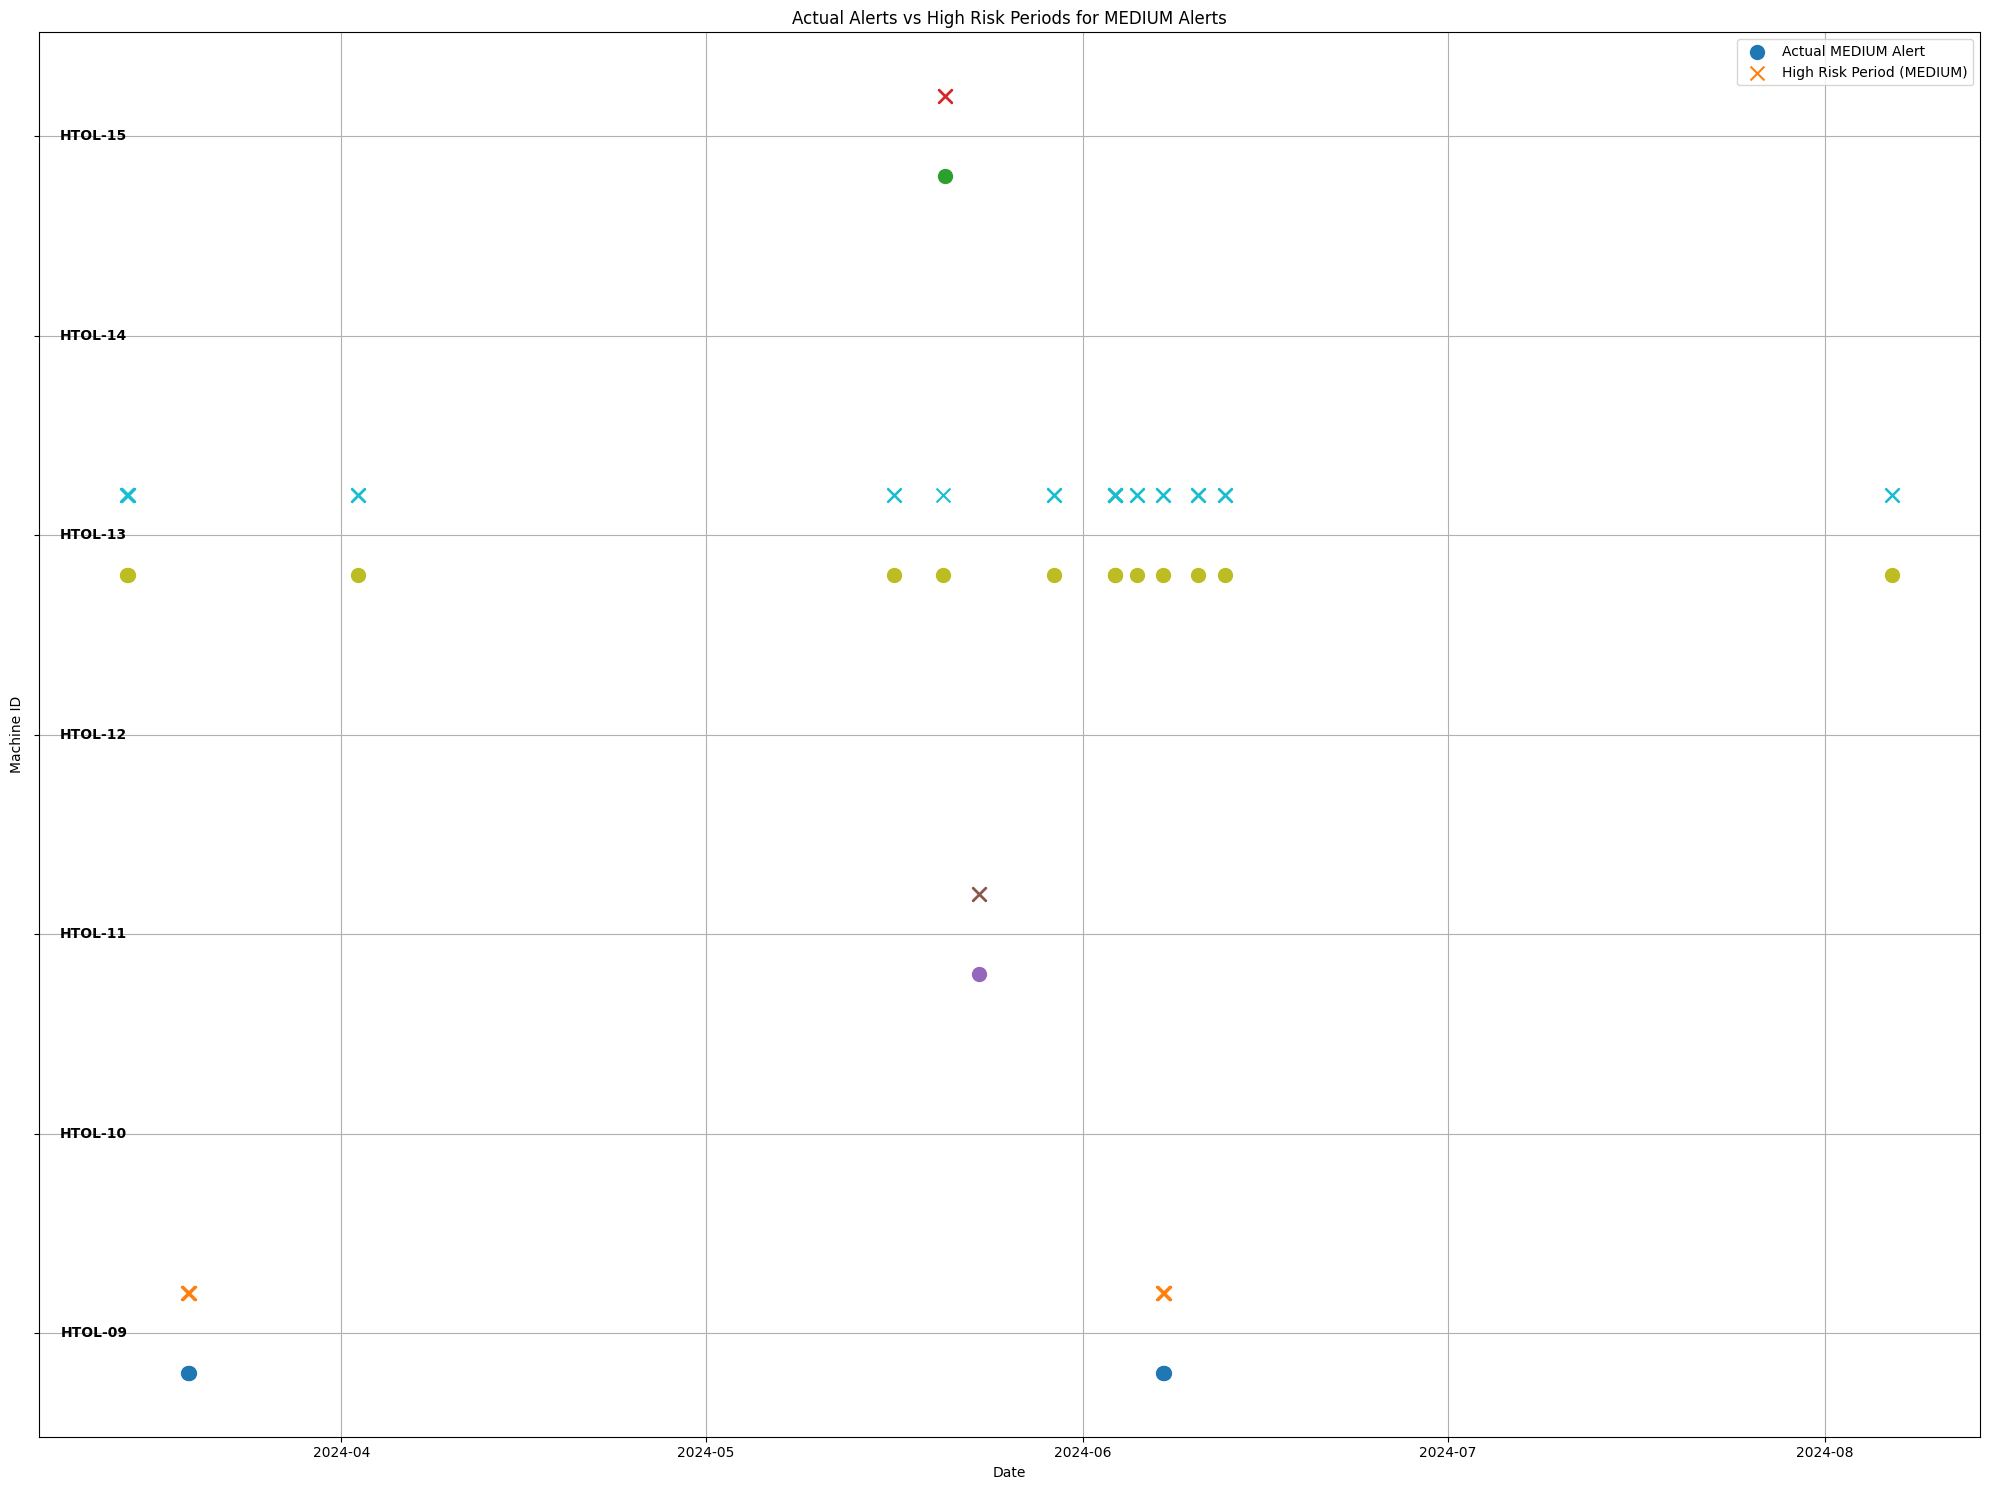


Training model for HIGH alerts:


/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_23965/3239783937.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['target'] = df.groupby('machine_id').apply(lambda x: (x['ALERT'] == target_alert_type).rolling(window=prediction_window).max().shift(-prediction_window+1)).reset_index(level=0, drop=True)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    265931
         1.0       1.00      0.30      0.46        10

    accuracy                           1.00    265941
   macro avg       1.00      0.65      0.73    265941
weighted avg       1.00      1.00      1.00    265941



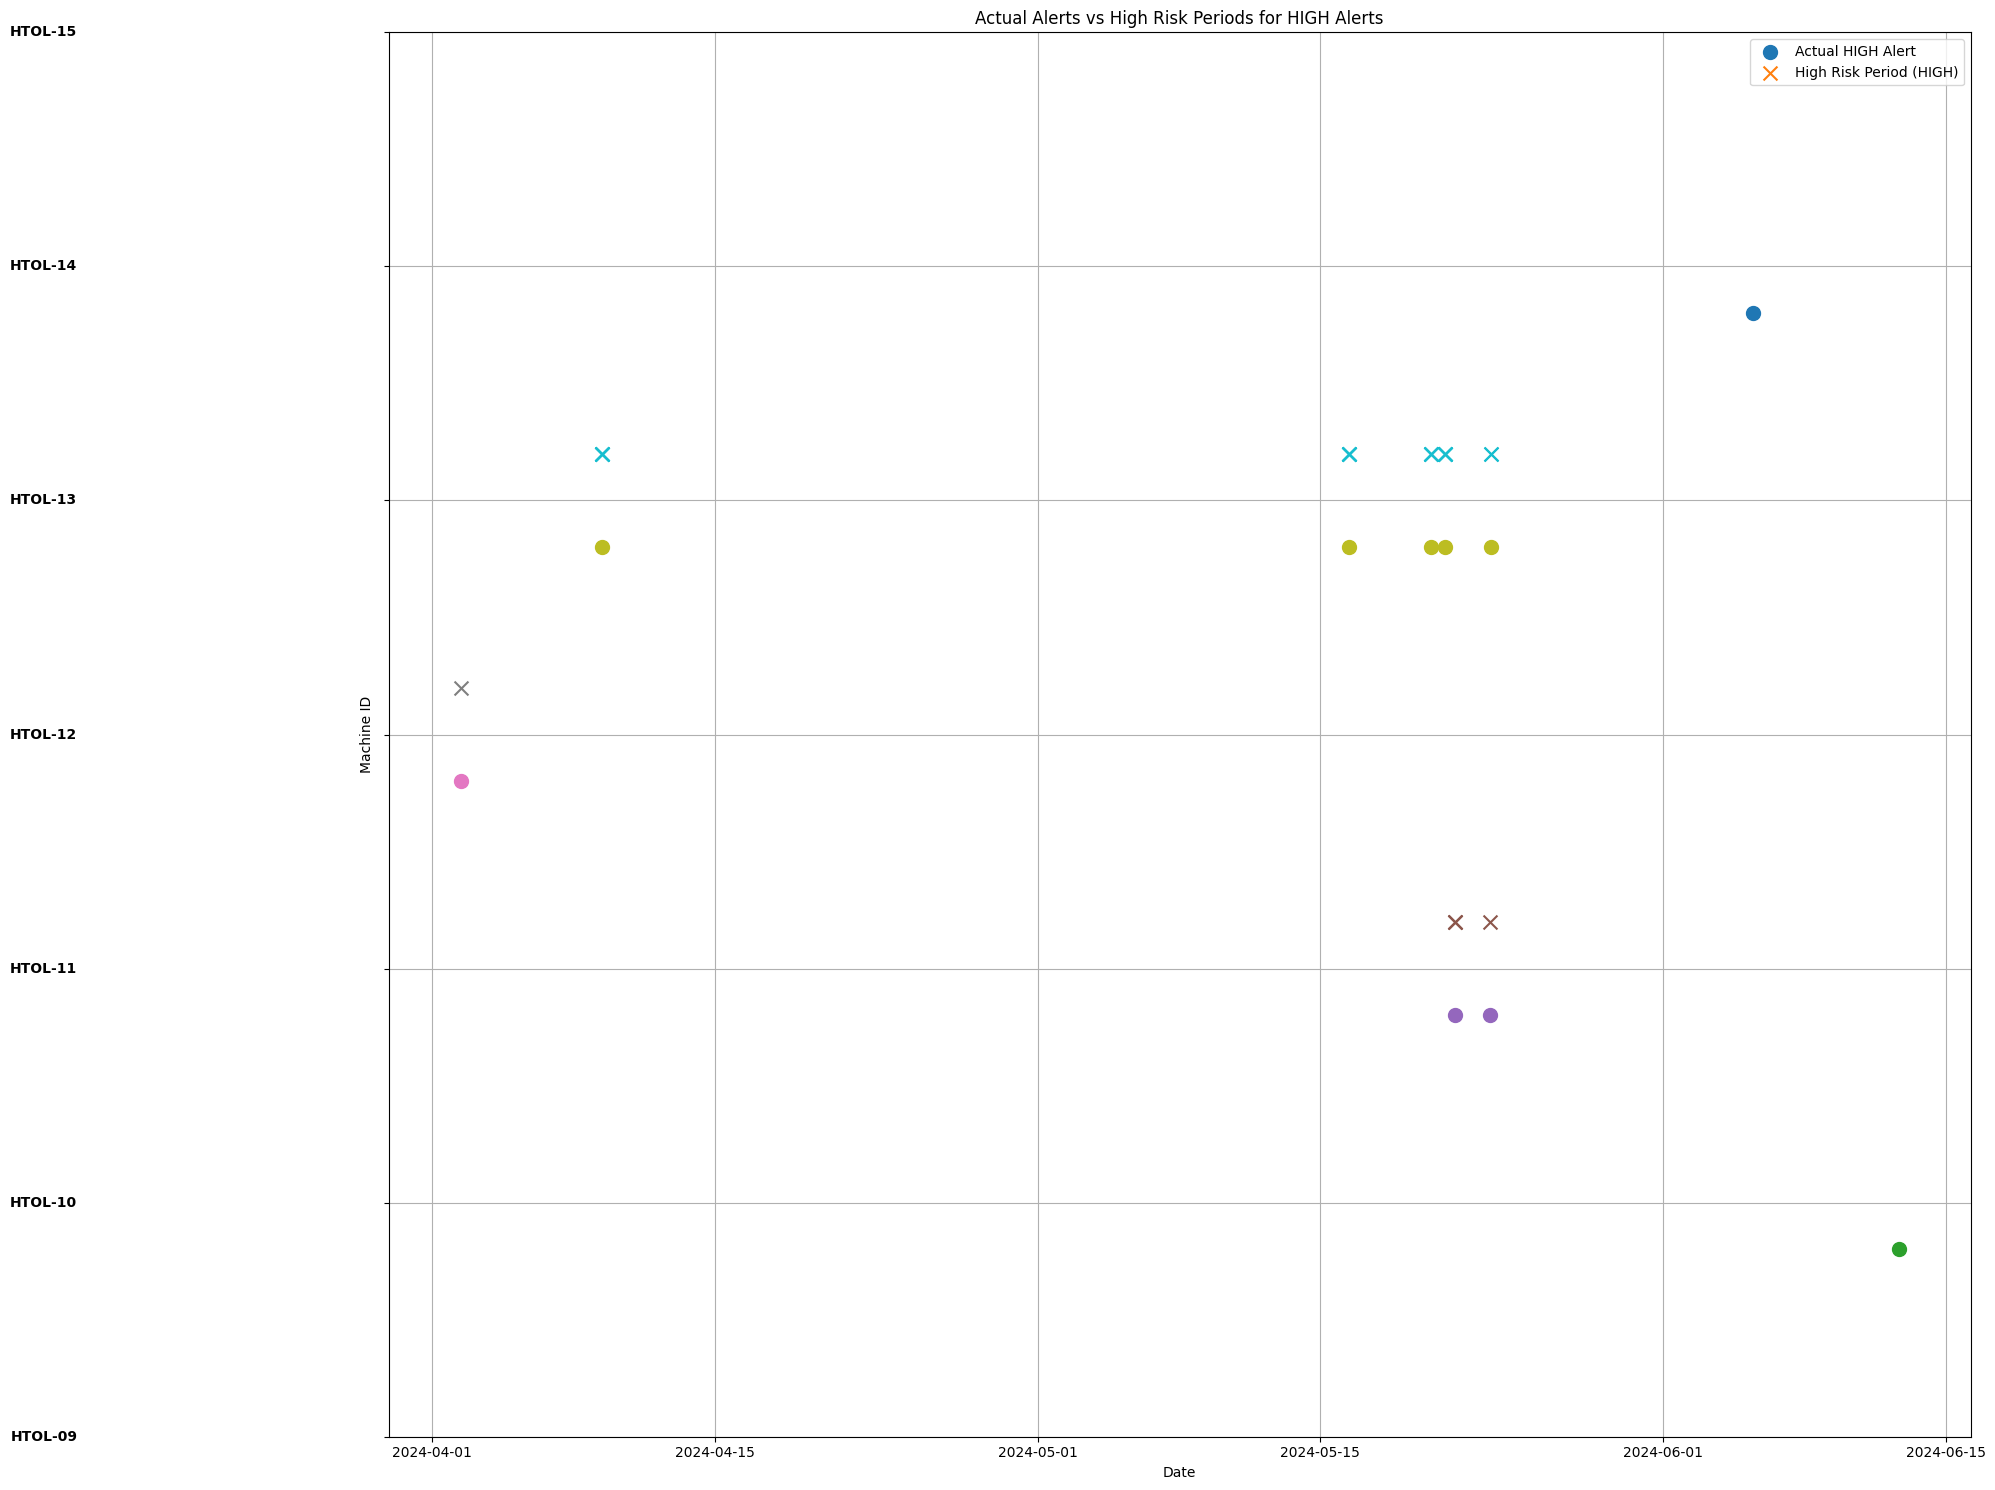


Training model for SIGMA alerts:


/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_23965/3239783937.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['target'] = df.groupby('machine_id').apply(lambda x: (x['ALERT'] == target_alert_type).rolling(window=prediction_window).max().shift(-prediction_window+1)).reset_index(level=0, drop=True)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    265921
         1.0       0.67      0.10      0.17        20

    accuracy                           1.00    265941
   macro avg       0.83      0.55      0.59    265941
weighted avg       1.00      1.00      1.00    265941



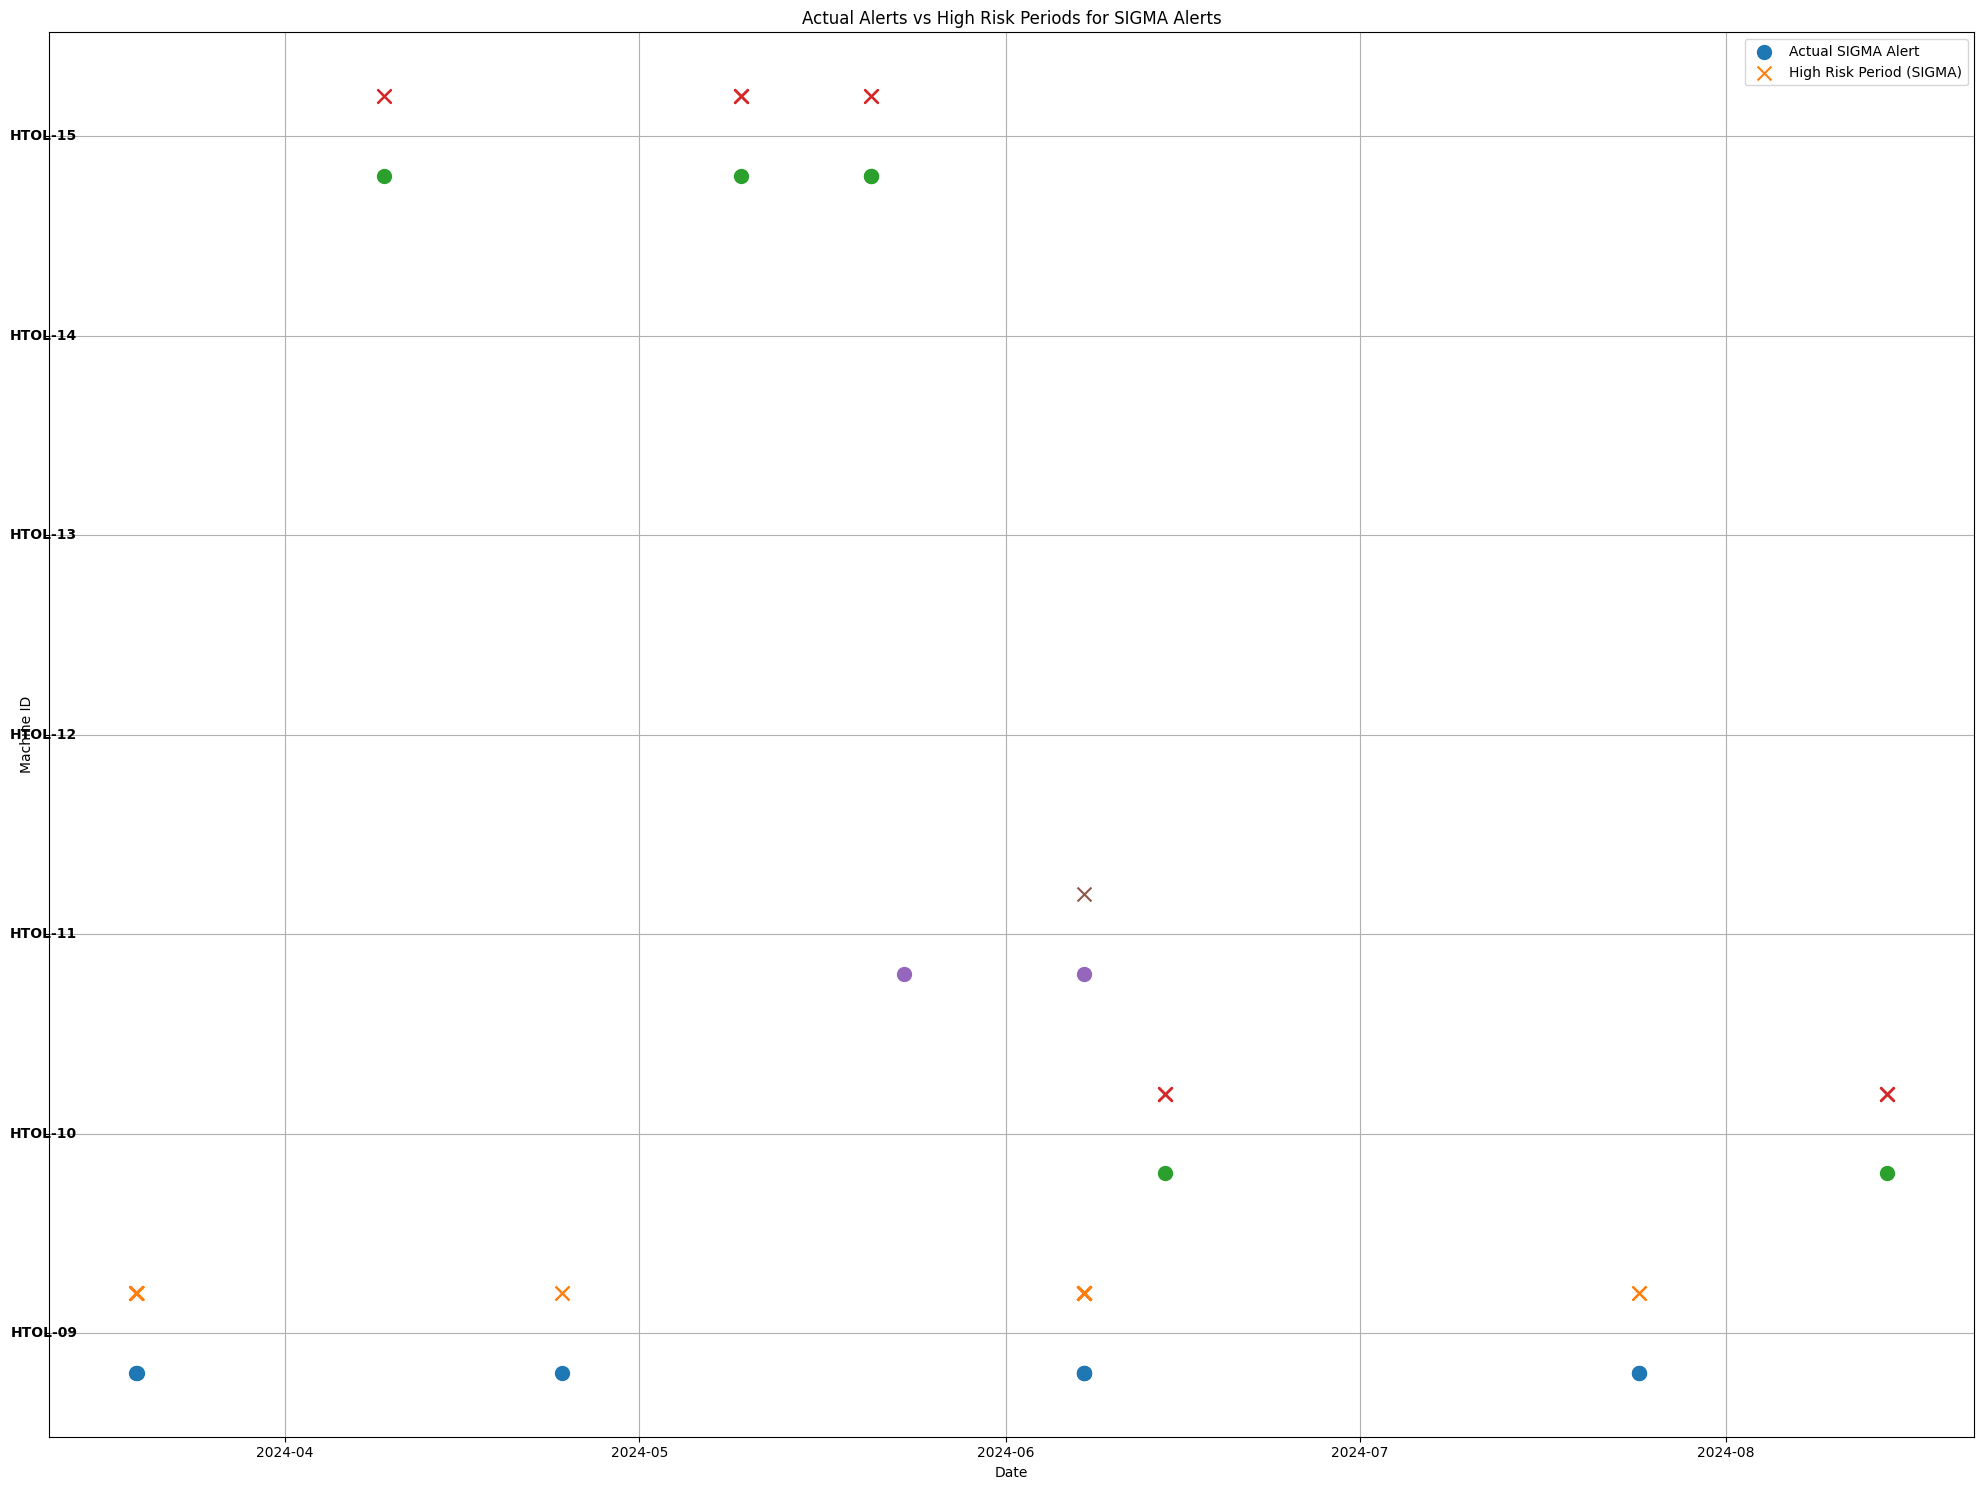

Probability of LOW alert in the next 7 days: 0.00
Probability of MEDIUM alert in the next 7 days: 0.00
Probability of HIGH alert in the next 7 days: 0.00
Probability of SIGMA alert in the next 7 days: 0.00


In [16]:
condition = True
# Main execution
if condition:
    folder = "../outlier_tolerance=5_grouping_time_window=200_anomaly_threshold=6_start_date=2022-01-01_end_date=2026-01-01"
    prediction_window = 7  # days
    probability_threshold = 0.7  # Adjust this value to balance between over-prediction and missed alerts

    df = load_and_preprocess_data(folder)
    df = engineer_features(df)

    alert_types = ['LOW', 'MEDIUM', 'HIGH', 'SIGMA']
    models = {}
    scalers = {}

    for alert_type in alert_types:
        print(f"\nTraining model for {alert_type} alerts:")
        X, y = prepare_data_for_classification(df, alert_type, prediction_window)
        model, scaler = train_and_evaluate_classifier(X, y)
        models[alert_type] = model
        scalers[alert_type] = scaler

        visualize_alerts_efficient(df, model, scaler, alert_type, prediction_window, probability_threshold)

    # Example of making predictions for new data
    new_data = df.iloc[-1:].copy()  # Use the last row as an example
    for alert_type in alert_types:
        features = ['ChlPrs', 'hour', 'day_of_week', 'month', 'is_weekend', 'rolling_mean', 'rolling_std'] + [f'time_since_{at}' for at in alert_types]
        X_new = new_data[features]
        X_new_scaled = scalers[alert_type].transform(X_new)
        alert_probability = models[alert_type].predict_proba(X_new_scaled)[0, 1]
        print(f"Probability of {alert_type} alert in the next {prediction_window} days: {alert_probability:.2f}")